In [1]:
import requests
import pandas as pd
import time

In [ ]:
# my OMDb API key
API_KEY = "6cd695ab" 


# List of 100 popular movies
movies = [
    "Inception", "Titanic", "The Matrix", "Interstellar", "The Dark Knight", "Avatar",
    "Gladiator", "The Godfather", "Pulp Fiction", "Forrest Gump", "The Shawshank Redemption",
    "The Lord of the Rings: The Return of the King", "The Lion King", "Saving Private Ryan",
    "Schindler's List", "Jurassic Park", "The Avengers", "Iron Man", "Spider-Man", "Black Panther",
    "Doctor Strange", "Thor", "Guardians of the Galaxy", "Deadpool", "Logan", "The Batman",
    "The Wolf of Wall Street", "Django Unchained", "The Departed", "Fight Club", "The Silence of the Lambs",
    "The Green Mile", "Goodfellas", "Se7en", "The Usual Suspects", "The Prestige", "Memento",
    "A Beautiful Mind", "The Grand Budapest Hotel", "Whiplash", "La La Land", "Mad Max: Fury Road",
    "Parasite", "Everything Everywhere All at Once", "No Country for Old Men", "There Will Be Blood",
    "The Social Network", "Her", "Eternal Sunshine of the Spotless Mind", "Shutter Island",
    "The Revenant", "12 Years a Slave", "Slumdog Millionaire", "The Pianist", "The Big Short",
    "Catch Me If You Can", "The Irishman", "Bohemian Rhapsody", "The Greatest Showman",
    "The Truman Show", "The Sixth Sense", "A Quiet Place", "Get Out", "Us", "It",
    "It Chapter Two", "The Conjuring", "Annabelle", "Sinister", "Insidious", "A Nightmare on Elm Street",
    "Halloween", "Scream", "The Exorcist", "Jaws", "Alien", "Blade Runner", "The Terminator",
    "Terminator 2: Judgment Day", "Back to the Future", "Star Wars: A New Hope",
    "Star Wars: The Empire Strikes Back", "Star Wars: Return of the Jedi", "Rogue One: A Star Wars Story",
    "The Hunger Games", "Dune", "Oppenheimer", "Barbie", "Mission: Impossible – Fallout",
    "John Wick", "John Wick: Chapter 4", "The Equalizer", "The Bourne Identity",
    "The Fast and the Furious", "Fast X", "Top Gun: Maverick", "The Meg", "Pacific Rim",
    "Godzilla vs. Kong", "King Kong", "The Jungle Book", "Coco", "Zootopia", "Inside Out"
]

# Base URL for OMDb API
BASE_URL = "http://www.omdbapi.com/"

# List to store movie details
movie_data = []

# Loop through each movie and fetch details
for movie in movies:
    params = {"t": movie, "apikey": API_KEY}
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data["Response"] == "True":
            movie_data.append({
                "Title": data.get("Title"),
                "Year": data.get("Year"),
                "Genre": data.get("Genre"),
                "Director": data.get("Director"),
                "Actors": data.get("Actors"),
                "IMDb Rating": data.get("imdbRating"),
                "Runtime": data.get("Runtime"),
                "Box Office": data.get("BoxOffice"),
                "Awards": data.get("Awards")
            })
        else:
            print(f"Movie '{movie}' not found!")
    else:
        print(f"Error fetching data for {movie}")

    # Respect API rate limits
    time.sleep(1)  # Add a 1-second delay to avoid being blocked


In [4]:
# Convert list to DataFrame
df = pd.DataFrame(movie_data)
df

,Title,Year,Genre,Director,Actors,IMDb Rating,Runtime,Box Office,Awards
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148 min,"$292,587,330",Won 4 Oscars. 159 wins & 220 nominations total
1,Titanic,1997,"Drama, Romance",James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane",7.9,194 min,"$674,292,608",Won 11 Oscars. 126 wins & 83 nominations total
2,The Matrix,1999,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,136 min,"$172,076,928",Won 4 Oscars. 42 wins & 52 nominations total
3,Interstellar,2014,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.7,169 min,"$203,227,580",Won 1 Oscar. 44 wins & 148 nominations total
4,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,152 min,"$534,987,076",Won 2 Oscars. 164 wins & 165 nominations total
...,...,...,...,...,...,...,...,...,...
99,King Kong,2005,"Action, Adventure, Romance",Peter Jackson,"Naomi Watts, Jack Black, Adrien Brody",7.2,187 min,"$218,080,025",Won 3 Oscars. 46 wins & 104 nominations total
100,The Jungle Book,2016,"Animation, Action, Adventure",Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley",7.3,106 min,"$364,001,123",Won 1 Oscar. 33 wins & 56 nominations total
101,Coco,2017,"Animation, Adventure, Drama","Lee Unkrich, Adrian Molina","Anthony Gonzalez, Gael García Bernal, Benjamin...",8.4,105 min,"$210,460,015",Won 2 Oscars. 112 wins & 42 nominations total
102,Zootopia,2016,"Animation, Action, Adventure","Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba",8.0,108 min,"$341,268,248",Won 1 Oscar. 49 wins & 75 nominations total


In [5]:
# Save DataFrame to CSV
df.to_csv("GROUP4_movies.csv", index=False)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [8]:
#split genres and count occurrences
from collections import Counter

# separating the list of genres
all_genres = [genre.strip() for genres in df["Genre"].dropna() for genre in genres.split(",")]

# count genre occurrences
genre_counts = Counter(all_genres)

# find the most common genre
most_common_genre = genre_counts.most_common(20)  #19 genres
most_common_genre


[('Drama', 51),
 ('Action', 41),
 ('Adventure', 34),
 ('Sci-Fi', 26),
 ('Crime', 21),
 ('Thriller', 20),
 ('Horror', 17),
 ('Mystery', 15),
 ('Biography', 13),
 ('Comedy', 13),
 ('Fantasy', 9),
 ('Romance', 6),
 ('Animation', 6),
 ('Music', 4),
 ('History', 3),
 ('War', 1),
 ('Western', 1),
 ('Musical', 1),
 ('Short', 1)]

In [9]:
genre_count  = Counter(df['Genre'])
genre_count

Counter({'Action, Adventure, Sci-Fi': 12,
         'Horror, Mystery, Thriller': 6,
         'Action, Adventure, Fantasy': 4,
         'Action, Crime, Thriller': 4,
         'Drama': 3,
         'Biography, Drama, History': 3,
         'Biography, Crime, Drama': 3,
         'Horror': 3,
         'Drama, Romance': 2,
         'Action, Sci-Fi': 2,
         'Action, Crime, Drama': 2,
         'Action, Adventure, Drama': 2,
         'Crime, Drama': 2,
         'Animation, Adventure, Drama': 2,
         'Action, Adventure, Comedy': 2,
         'Action, Drama, Sci-Fi': 2,
         'Crime, Drama, Thriller': 2,
         'Crime, Drama, Mystery': 2,
         'Drama, Romance, Sci-Fi': 2,
         'Drama, Mystery, Thriller': 2,
         'Biography, Drama, Music': 2,
         'Animation, Action, Adventure': 2,
         'Adventure, Drama, Sci-Fi': 1,
         'Adventure, Drama, Fantasy': 1,
         'Drama, War': 1,
         'Action, Fantasy': 1,
         'Action, Comedy, Sci-Fi': 1,
         'Biogra

In [10]:
df.dtypes

Title          object
Year           object
Genre          object
Director       object
Actors         object
IMDb Rating    object
Runtime        object
Box Office     object
Awards         object
dtype: object

In [11]:
df.isna().sum()

Title          0
Year           0
Genre          0
Director       0
Actors         0
IMDb Rating    0
Runtime        0
Box Office     2
Awards         0
dtype: int64

In [12]:
# Display unique values that are non-numeric
print(df['Box Office'][df['Box Office'].str.contains(r'[^0-9.]', regex=True, na=False)])


0      $292,587,330
1      $674,292,608
2      $172,076,928
3      $203,227,580
4      $534,987,076
           ...     
99     $218,080,025
100    $364,001,123
101    $210,460,015
102    $341,268,248
103    $356,461,711
Name: Box Office, Length: 102, dtype: object


In [13]:
df['Box Office'] = df['Box Office'].str.strip()

In [14]:
df['Box Office'] = df['Box Office'].replace(r'[$,]', '', regex=True)

In [15]:
df['Box Office'] = df['Box Office'].str.strip()

In [16]:
df['Box Office'] = df['Box Office'].replace(['N/A', 'Unknown', '-', ''], float('nan'))

In [17]:
df

,Title,Year,Genre,Director,Actors,IMDb Rating,Runtime,Box Office,Awards
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148 min,292587330,Won 4 Oscars. 159 wins & 220 nominations total
1,Titanic,1997,"Drama, Romance",James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane",7.9,194 min,674292608,Won 11 Oscars. 126 wins & 83 nominations total
2,The Matrix,1999,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,136 min,172076928,Won 4 Oscars. 42 wins & 52 nominations total
3,Interstellar,2014,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.7,169 min,203227580,Won 1 Oscar. 44 wins & 148 nominations total
4,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,152 min,534987076,Won 2 Oscars. 164 wins & 165 nominations total
...,...,...,...,...,...,...,...,...,...
99,King Kong,2005,"Action, Adventure, Romance",Peter Jackson,"Naomi Watts, Jack Black, Adrien Brody",7.2,187 min,218080025,Won 3 Oscars. 46 wins & 104 nominations total
100,The Jungle Book,2016,"Animation, Action, Adventure",Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley",7.3,106 min,364001123,Won 1 Oscar. 33 wins & 56 nominations total
101,Coco,2017,"Animation, Adventure, Drama","Lee Unkrich, Adrian Molina","Anthony Gonzalez, Gael García Bernal, Benjamin...",8.4,105 min,210460015,Won 2 Oscars. 112 wins & 42 nominations total
102,Zootopia,2016,"Animation, Action, Adventure","Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba",8.0,108 min,341268248,Won 1 Oscar. 49 wins & 75 nominations total


In [18]:
df['Box Office'] = df['Box Office'].astype(float)

In [19]:
df.head(7)

,Title,Year,Genre,Director,Actors,IMDb Rating,Runtime,Box Office,Awards
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148 min,292587330.0,Won 4 Oscars. 159 wins & 220 nominations total
1,Titanic,1997,"Drama, Romance",James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane",7.9,194 min,674292608.0,Won 11 Oscars. 126 wins & 83 nominations total
2,The Matrix,1999,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,136 min,172076928.0,Won 4 Oscars. 42 wins & 52 nominations total
3,Interstellar,2014,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.7,169 min,203227580.0,Won 1 Oscar. 44 wins & 148 nominations total
4,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,152 min,534987076.0,Won 2 Oscars. 164 wins & 165 nominations total
5,Avatar,2009,"Action, Adventure, Fantasy",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver",7.9,162 min,785221649.0,Won 3 Oscars. 91 wins & 131 nominations total
6,Gladiator,2000,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",8.5,155 min,187705427.0,Won 5 Oscars. 60 wins & 104 nominations total


In [20]:
df['Box Office'].isna().sum()

4

In [21]:
df.isna().sum()

Title          0
Year           0
Genre          0
Director       0
Actors         0
IMDb Rating    0
Runtime        0
Box Office     4
Awards         0
dtype: int64

In [22]:
import numpy as np

In [23]:
#this code is to impute the missing values in the box office column basing on the genre.
#expand multi-genre movies into separate rows
df_expanded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

#compute average Box Office for each genre
genre_avg_box_office = df_expanded.groupby('Genre')['Box Office'].mean()

#Function to fill missing Box Office values
def fill_missing_box_office(row):
    if np.isnan(row['Box Office']):  # Check if Box Office is missing
        genres = row['Genre'].split(', ')  # Split genres
        avg_values = [genre_avg_box_office[genre] for genre in genres if genre in genre_avg_box_office]
        return np.mean(avg_values) if avg_values else np.nan  # Return average if available
    return row['Box Office']

#apply the function to fill missing values
df['Box Office'] = df.apply(fill_missing_box_office, axis=1)

#fill any remaining NaN values (if no genre match was found)
df['Box Office'].fillna(df['Box Office'].mean(), inplace=True)

#check results
print(df[['Genre', 'Box Office']].head(10))


                        Genre   Box Office
0   Action, Adventure, Sci-Fi  292587330.0
1              Drama, Romance  674292608.0
2              Action, Sci-Fi  172076928.0
3    Adventure, Drama, Sci-Fi  203227580.0
4        Action, Crime, Drama  534987076.0
5  Action, Adventure, Fantasy  785221649.0
6    Action, Adventure, Drama  187705427.0
7                Crime, Drama  136381073.0
8                Crime, Drama  107928762.0
9              Drama, Romance  330455270.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20540\608759446.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Box Office'].fillna(df['Box Office'].mean(), inplace=True)


In [24]:
df.isna().sum()

Title          0
Year           0
Genre          0
Director       0
Actors         0
IMDb Rating    0
Runtime        0
Box Office     0
Awards         0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df.dtypes

Title           object
Year            object
Genre           object
Director        object
Actors          object
IMDb Rating     object
Runtime         object
Box Office     float64
Awards          object
dtype: object

In [27]:
df['IMDb Rating'] = pd.to_numeric(df['IMDb Rating'], errors='coerce')


In [28]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [29]:
df.dtypes

Title           object
Year             int64
Genre           object
Director        object
Actors          object
IMDb Rating    float64
Runtime         object
Box Office     float64
Awards          object
dtype: object

In [30]:
df.isna().sum()

Title          0
Year           0
Genre          0
Director       0
Actors         0
IMDb Rating    1
Runtime        0
Box Office     0
Awards         0
dtype: int64

In [33]:
# Group by Year and calculate the average Box Office per year
yearly_box_office = df.groupby('Year')['Box Office'].mean()
yearly_box_office.head(6)

Year
1972    136381073.0
1973    233005644.0
1975    267263625.0
1978     47160000.0
1979     84206106.0
1982     32914489.0
Name: Box Office, dtype: float64

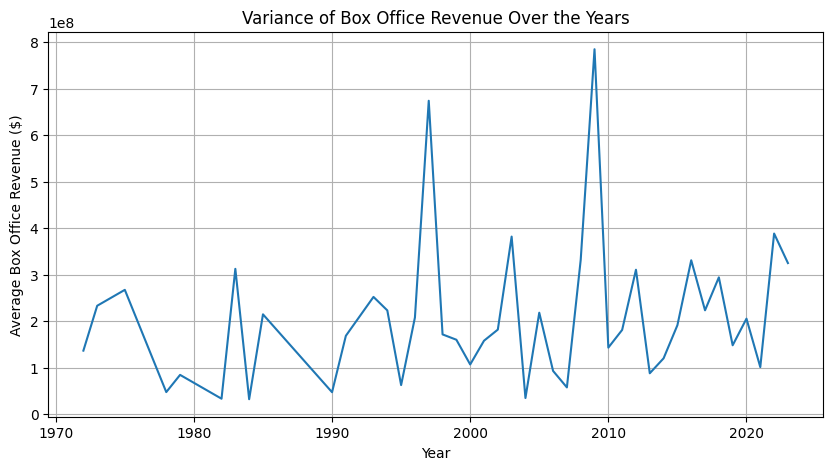

In [34]:
# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(yearly_box_office.index, yearly_box_office.values, linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Box Office Revenue ($)')
plt.title('Variance of Box Office Revenue Over the Years')
plt.grid(True)

# Show the plot
plt.show()

In [35]:
df['IMDb Rating']=df['IMDb Rating'].fillna(df['IMDb Rating'].mean())

In [36]:
# Group by Year and calculate the average IMDb Rating per year
yearly_imdb = df.groupby('Year')['IMDb Rating'].mean()

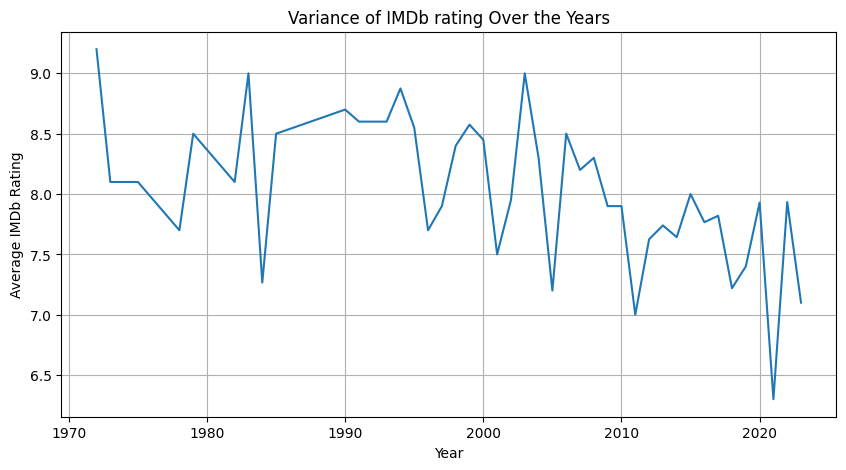

In [37]:
# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(yearly_imdb.index, yearly_imdb.values, linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('Variance of IMDb rating Over the Years')
plt.grid(True)

# Show the plot
plt.show()

In [38]:
df['IMDb Rating'].mean()

7.929126213592232

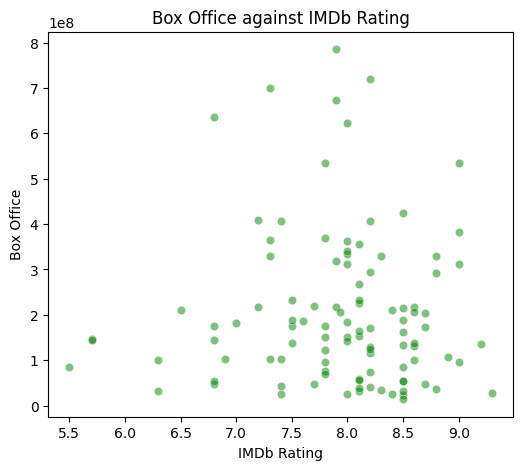

In [39]:
##3. IMDb Rating vs the parameters
#IMDb vs Box Office
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='IMDb Rating',y='Box Office',alpha=0.5,color='green')
plt.title('Box Office against IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20540\1397919289.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDb Rating',y='Title',data=recent_releases,palette='viridis')


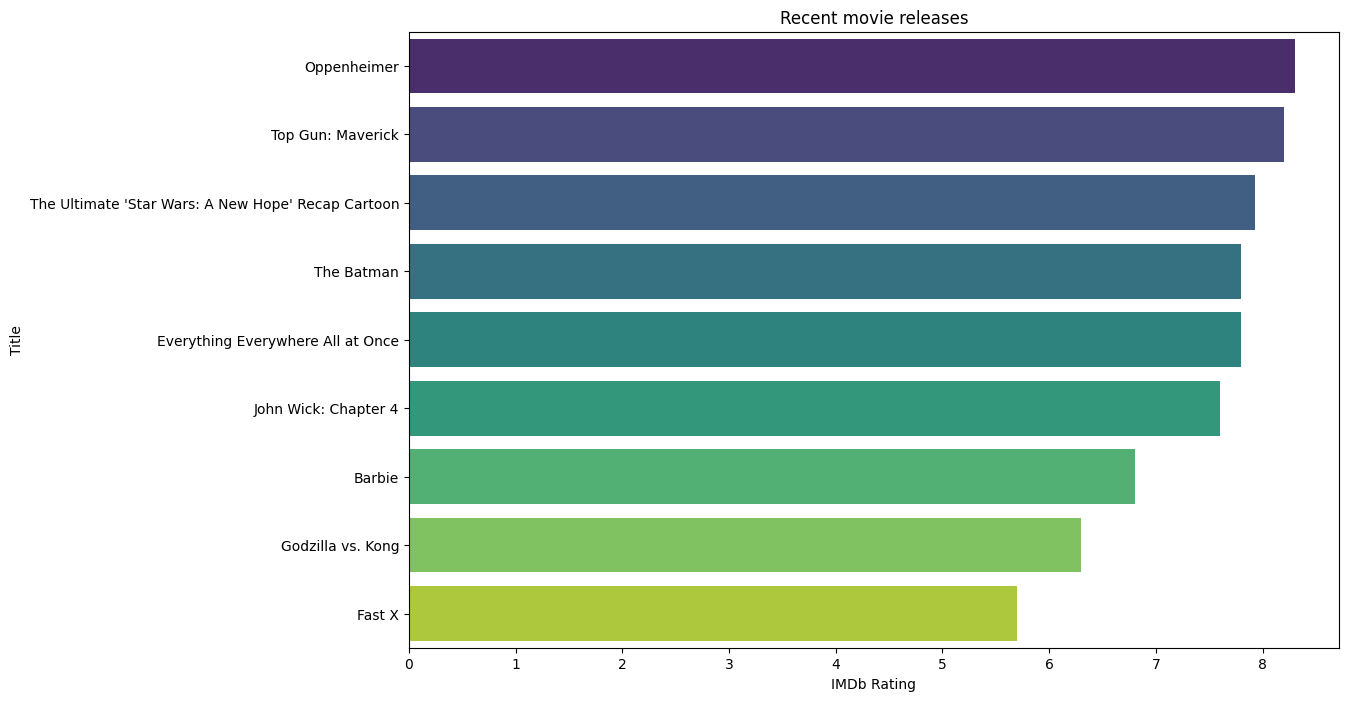

In [40]:
#IMDb vs Movie
#filter for recent years
recent_releases=df[df['Year']>=2020]

#sort in descending order
recent_releases=recent_releases.sort_values(by='IMDb Rating',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='IMDb Rating',y='Title',data=recent_releases,palette='viridis')
plt.xlabel('IMDb Rating')
plt.ylabel('Title')
plt.title('Recent movie releases')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20540\3536613233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


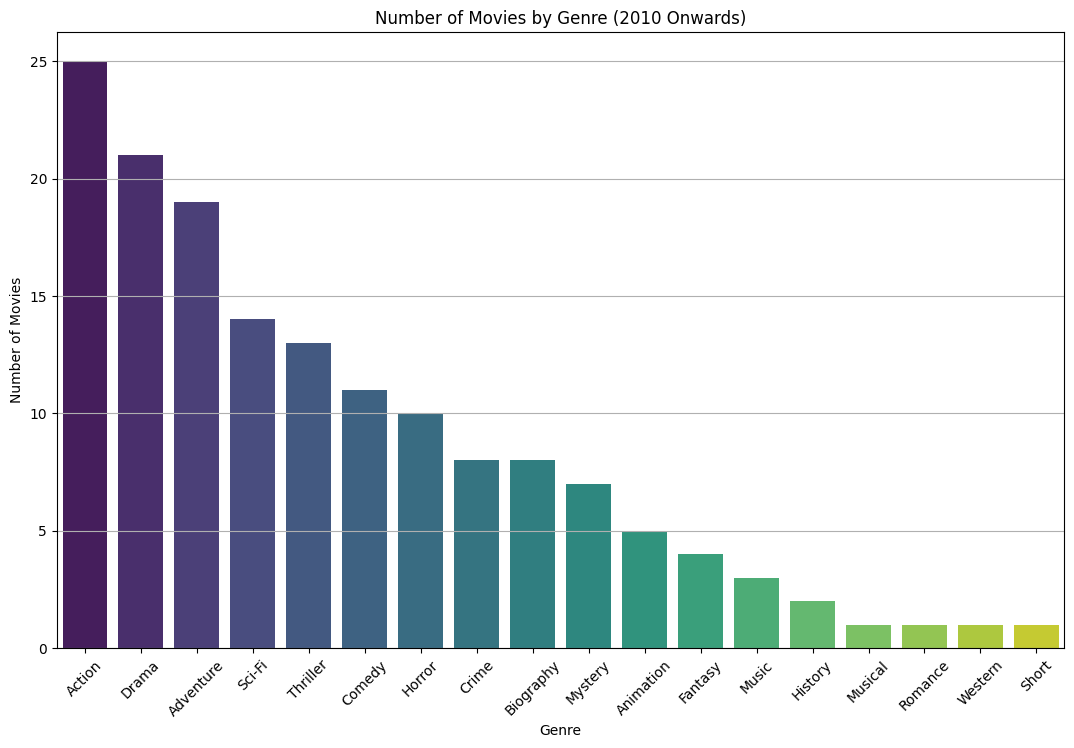

In [41]:
#filter for recent releases
recent_releases=df[df['Year']>=2010]

# Split genres and explode into separate rows
df_exploded = recent_releases.assign(Genre=recent_releases['Genre'].str.split(', ')).explode('Genre')

# Count occurrences of each genre
genre_counts = df_exploded['Genre'].value_counts()

# Plot
plt.figure(figsize=(13, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre (2010 Onwards)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.show()

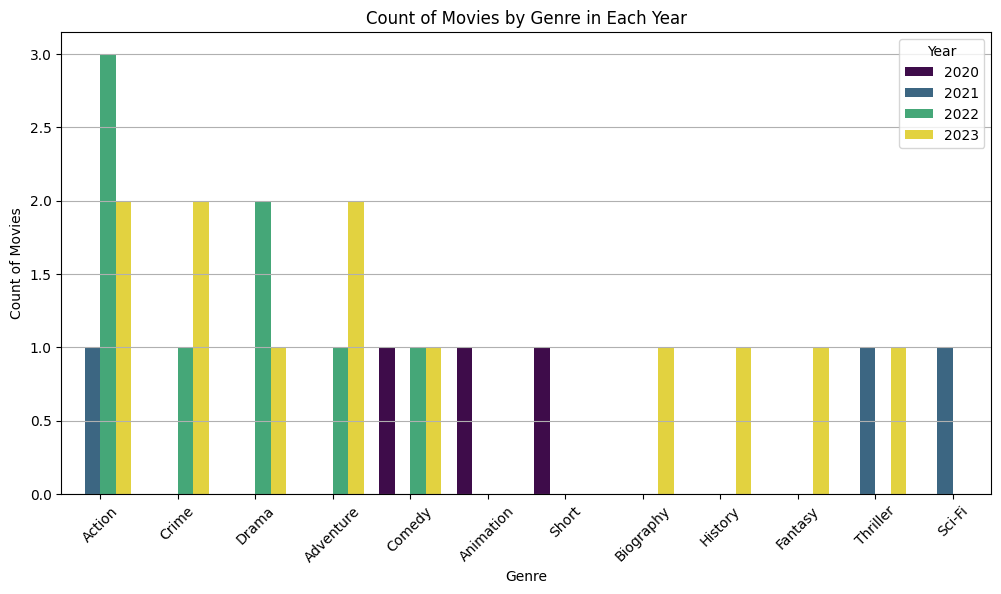

In [42]:
recent_releases=df[df['Year']>=2020]

# Split genres and explode into separate rows
df_exploded = recent_releases.assign(Genre=recent_releases['Genre'].str.split(', ')).explode('Genre')

# Count movies per genre per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x="Genre", hue="Year", palette="viridis")

# Labels and title
plt.title("Count of Movies by Genre in Each Year")
plt.xlabel("Genre")
plt.ylabel("Count of Movies")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y')

# Show the plot
plt.show()


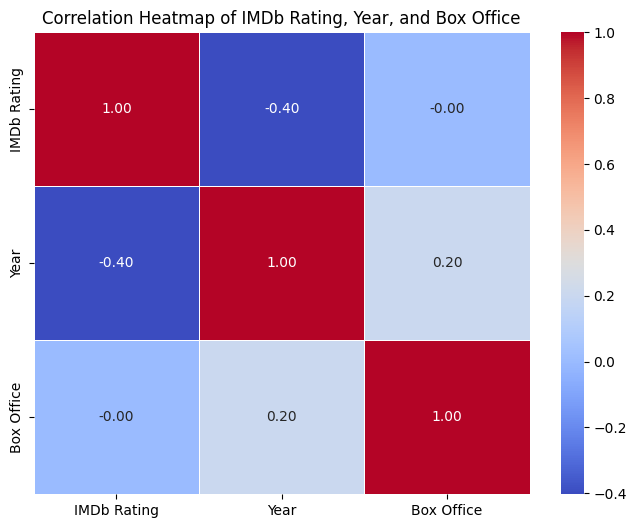

In [40]:
# Select only numerical columns for correlation
corr_matrix = df[['IMDb Rating', 'Year', 'Box Office']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of IMDb Rating, Year, and Box Office")
plt.show()

In [41]:
##statistical techniques
#using pearson's rank correlation method
correlation = df[['IMDb Rating', 'Year', 'Box Office']].corr(method='pearson')
print(correlation)


             IMDb Rating      Year  Box Office
IMDb Rating     1.000000 -0.403053    -0.00164
Year           -0.403053  1.000000     0.20182
Box Office     -0.001640  0.201820     1.00000


In [42]:
#using spearman's rank correlation coefficient
spearman_corr = df[['IMDb Rating', 'Year', 'Box Office']].corr(method='spearman')
print(spearman_corr)


             IMDb Rating      Year  Box Office
IMDb Rating     1.000000 -0.491377   -0.076146
Year           -0.491377  1.000000    0.251357
Box Office     -0.076146  0.251357    1.000000
